In [2]:
import seaborn as sns
import pandas as pd
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from tqdm import tqdm

In [3]:
drugsTrain = pd.read_csv('./drugsTrain_y_m.csv')
drugsTest = pd.read_csv('./Data/drugsComTest_raw.csv')

In [10]:
drugsTrain

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79


## Add three columns to the dataframe (month, year, month_year)

In [16]:
date_train = drugsTrain['date']
len(date_train)

161297

In [32]:
def date2year_month(date):
    date_vec = datetime.strptime(date, '%d-%b-%y')
    return date_vec.strftime('%Y-%m')

In [33]:
date_train[0]

'20-May-12'

In [34]:
date2year_month(date_train[0])

'2012-05'

In [38]:
date_fmt = [date2year_month(i) for i in date_train]
date_fmt[0]

'2012-05'

In [62]:
drugsTrain['year_month'] = None
for i in tqdm(range(len(drugsTrain))):
    drugsTrain.loc[i, 'year_month'] = date2year_month(drugsTrain.loc[i, 'date'])
    
drugsTrain['year'] = None
drugsTrain['month'] = None
for i in tqdm(range(len(drugsTrain))):
    drugsTrain.loc[i, 'year'], drugsTrain.loc[i, 'month'] = drugsTrain.loc[i, 'year_month'].split('-')
    drugsTrain.loc[i, 'year'] = int(drugsTrain.loc[i, 'year'])
    drugsTrain.loc[i, 'month'] = int(drugsTrain.loc[i, 'month'])
drugsTrain.to_csv('drugsTrain_y_m.csv')

100%|██████████| 161297/161297 [24:02<00:00, 111.84it/s]


,uniqueID,drugName,condition,review,rating,date,usefulCount,year_month
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,2012-05
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,2010-04
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,2009-12
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,2015-11
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,2016-11
...,...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125,2015-05
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34,2011-11
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35,2014-03
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79,2015-09


## Convert the year-month to Counts

In [114]:
year_month_count = dict()
for i in range(len(drugsTrain)):
    year_month = (drugsTrain.loc[i, 'year'], drugsTrain.loc[i, 'month'])
    if year_month not in list(year_month_count.keys()):
        year_month_count[year_month] = 1
    else:
        year_month_count[year_month] += 1

In [149]:
y_m_c = pd.DataFrame(columns=('year','month','count'))
index = 0
for i in year_month_count:
    row={'year':i[0], 'month':i[1], 'count':year_month_count[i]}
    y_m_c.loc[index] = row
    index += 1
y_m_c.loc[index] = {'year': 2008, 'month':1, 'count':1}
y_m_c

,year,month,count
0,2012,5,830
1,2010,4,710
2,2009,12,971
3,2015,11,2641
4,2016,11,2747
...,...,...,...
115,2010,12,694
116,2008,9,443
117,2008,10,505
118,2008,2,94


<AxesSubplot:xlabel='year', ylabel='month'>

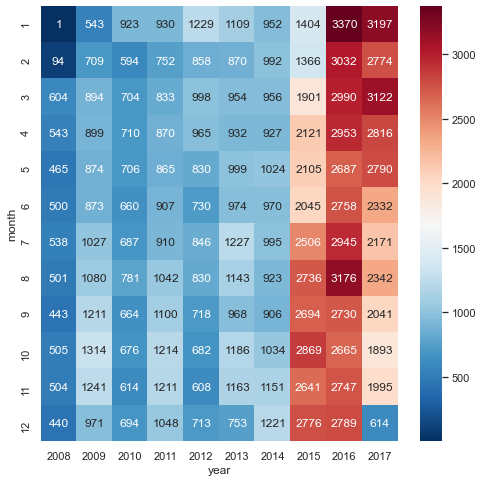

In [158]:
data = y_m_c.pivot("month","year","count")
sns.heatmap(data=data.astype('int'),annot=True,fmt="d",cmap="RdBu_r")

In [157]:
data.astype('int')

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
month,,,,,,,,,,
1,1,543,923,930,1229,1109,952,1404,3370,3197
2,94,709,594,752,858,870,992,1366,3032,2774
3,604,894,704,833,998,954,956,1901,2990,3122
4,543,899,710,870,965,932,927,2121,2953,2816
5,465,874,706,865,830,999,1024,2105,2687,2790
6,500,873,660,907,730,974,970,2045,2758,2332
7,538,1027,687,910,846,1227,995,2506,2945,2171
8,501,1080,781,1042,830,1143,923,2736,3176,2342
9,443,1211,664,1100,718,968,906,2694,2730,2041


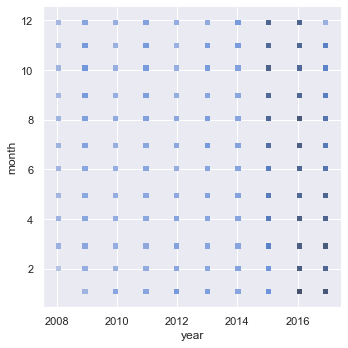

In [134]:
sns.displot(data=drugsTrain, x="year", y="month")

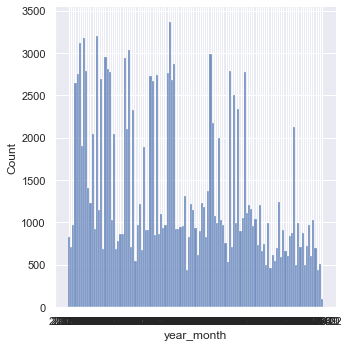

In [68]:
sns.displot(drugsTrain, x="year_month", discrete=True)

## Rating

In [41]:
rating_training = drugsTrain['rating']

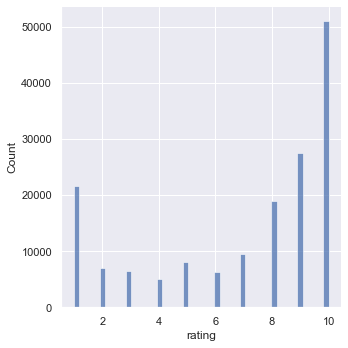

In [69]:
sns.set()
sns.displot(drugsTrain, x="rating")
plt.show()

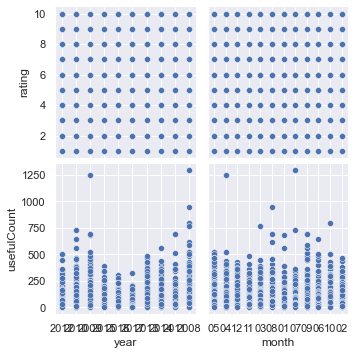

In [83]:
# sns.pairplot(drugsTrain)
sns.pairplot(
    drugsTrain,
    y_vars=["rating", "usefulCount"],
    x_vars=["year", "month"],
)

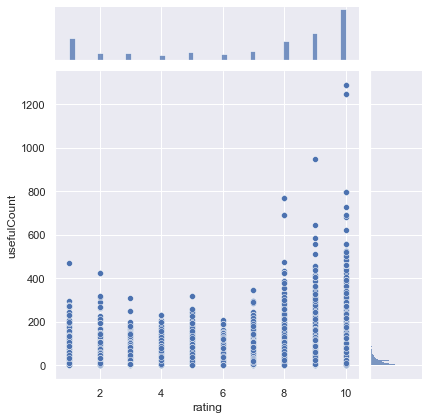

In [80]:
sns.set()
sns.jointplot(data=drugsTrain, x='rating', y='usefulCount');
# sns.displot(drugsTrain, x="rating", y="usefulCount")
plt.show()

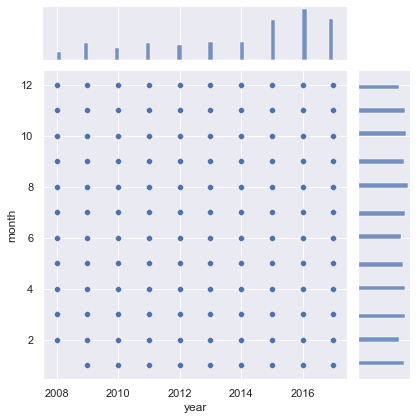

In [135]:
sns.set()
sns.jointplot(data=drugsTrain, x='year', y='month');
# sns.displot(drugsTrain, x="rating", y="usefulCount")
plt.show()

In [90]:
drugsTrain['year'] = None
drugsTrain['month'] = None
for i in tqdm(range(len(drugsTrain))):
    drugsTrain.loc[i, 'year'], drugsTrain.loc[i, 'month'] = drugsTrain.loc[i, 'year_month'].split('-')
    drugsTrain.loc[i, 'year'] = int(drugsTrain.loc[i, 'year'])
    drugsTrain.loc[i, 'month'] = int(drugsTrain.loc[i, 'month'])

100%|██████████| 161297/161297 [52:34<00:00, 51.14it/s]  


In [112]:
drugsTrain

,uniqueID,drugName,condition,review,rating,date,usefulCount,year_month,year,month
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,2012-05,2012,5
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,2010-04,2010,4
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,2009-12,2009,12
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,2015-11,2015,11
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,2016-11,2016,11
...,...,...,...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125,2015-05,2015,5
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34,2011-11,2011,11
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35,2014-03,2014,3
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79,2015-09,2015,9


In [89]:
drugsTrain.loc[0, 'usefulCount']

27

[Text(0.5, 1.0, 'Counts with year'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Count')]

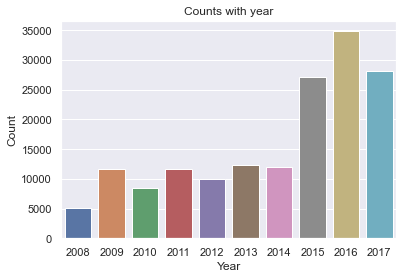

In [5]:
sns.set()
year_count = drugsTrain['year'].value_counts()
graph = sns.barplot(x=year_count.index, y=year_count.values)
graph.set(title='Counts with year', xlabel='Year', ylabel='Count')

[Text(0.5, 1.0, 'Month with year'), Text(0.5, 0, 'Month')]

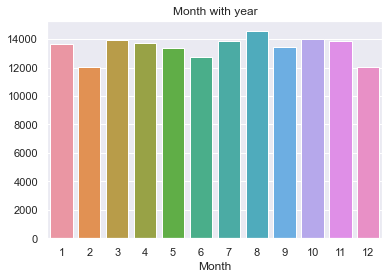

In [105]:
month_count = drugsTrain['month'].value_counts()
graph = sns.barplot(x=month_count.index, y=month_count.values)
graph.set(title='Month with year', xlabel='Month')

[Text(0.5, 1.0, 'Rating Frequency'), Text(0.5, 0, 'rating')]

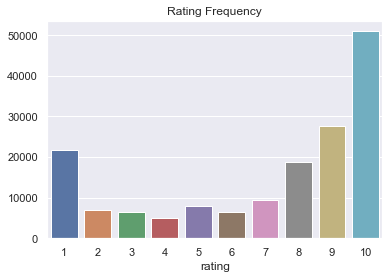

In [106]:
rating_count = drugsTrain['rating'].value_counts()
graph = sns.barplot(x=rating_count.index, y=rating_count.values)
graph.set(title='Rating Frequency', xlabel='rating')

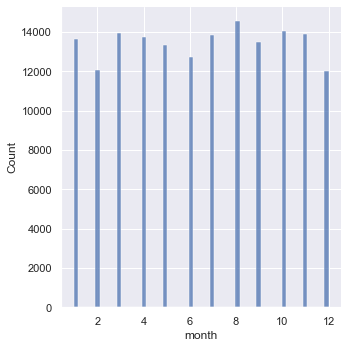

In [92]:
sns.displot(drugsTrain, x='month')

## Webmd Dataset

In [107]:
webmd = pd.read_csv('./Data/webmd.csv')

In [108]:
webmd

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1
...,...,...,...,...,...,...,...,...,...,...,...,...
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1


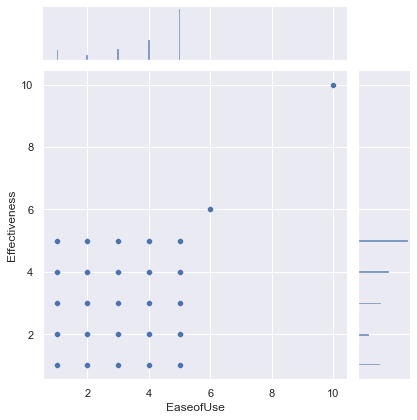

In [109]:
sns.set()
sns.jointplot(data=webmd, x='EaseofUse', y='Effectiveness');
# sns.displot(drugsTrain, x="rating", y="usefulCount")
plt.show()